In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv('ds_salaries.csv')
# Drop unnamed：0
df.drop('Unnamed: 0',axis=1,inplace=True)

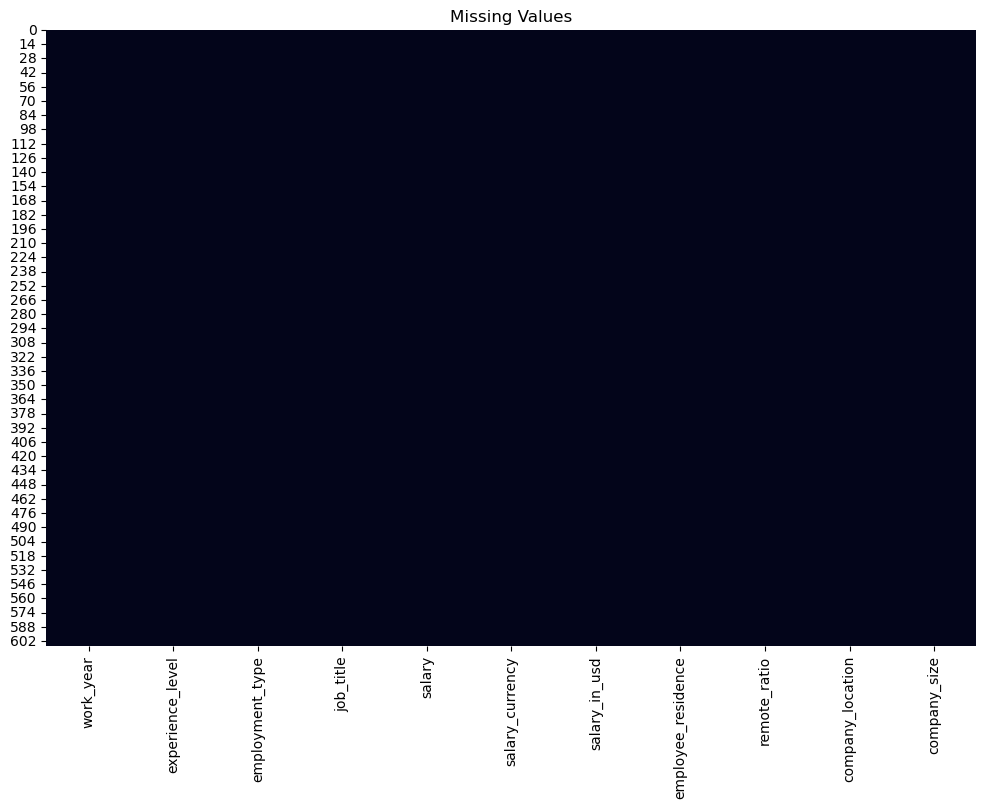

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Draw a heatmap for missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

There are no missing values in any of the following columns: work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, and size. This implies that the dataset is comprehensive and reliable, offering a strong basis for any additional research. Consequently, we merely proceed using the same dataset.

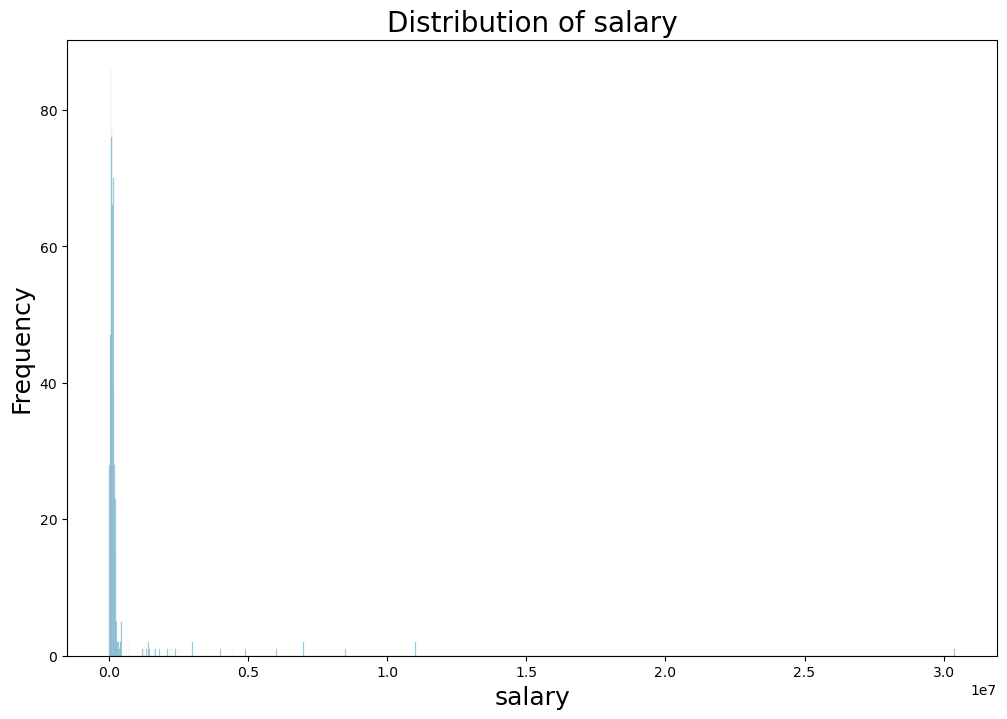

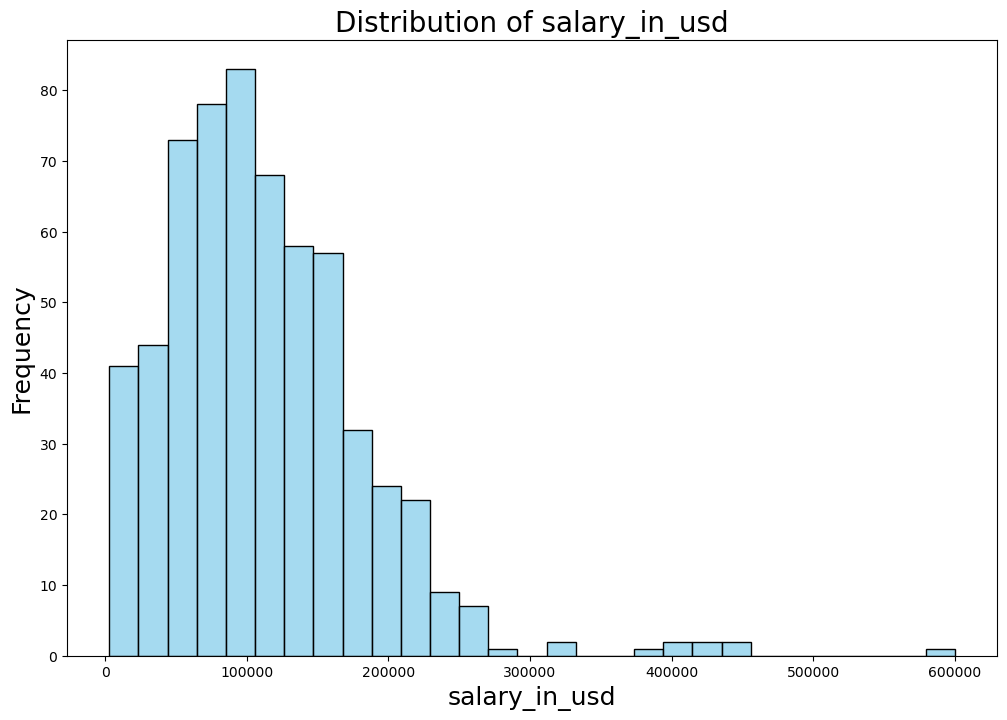

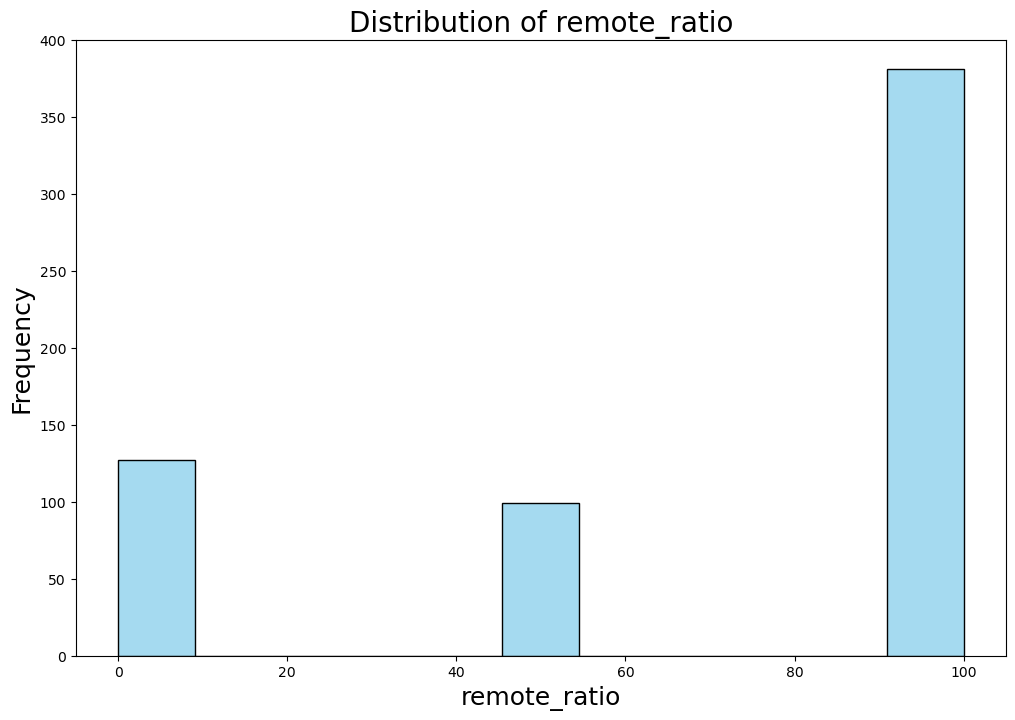

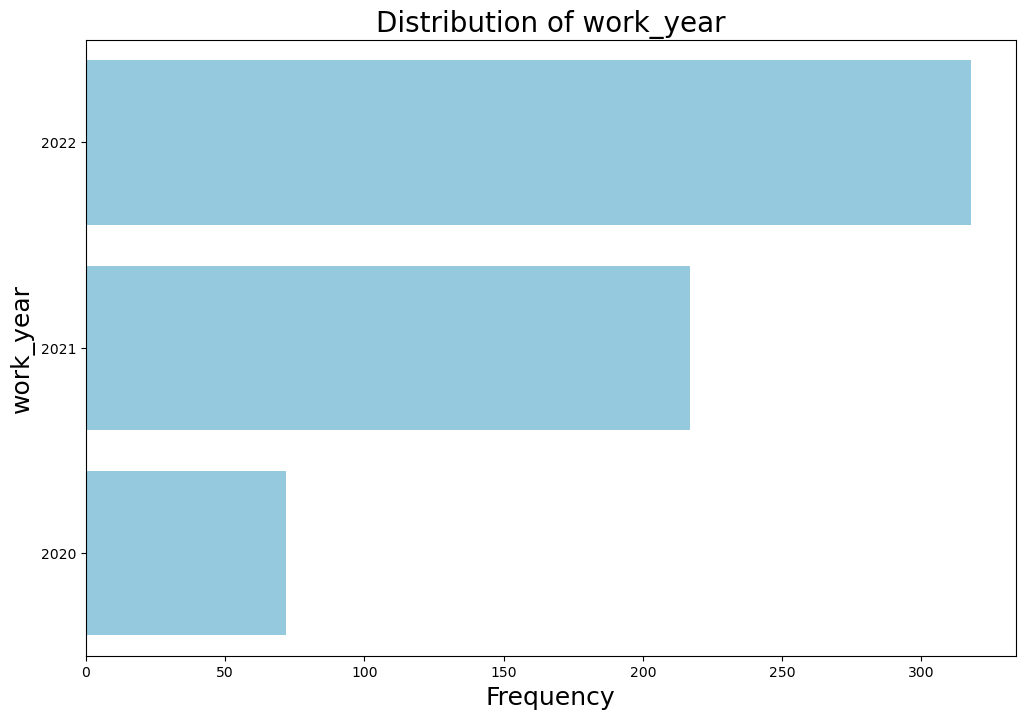

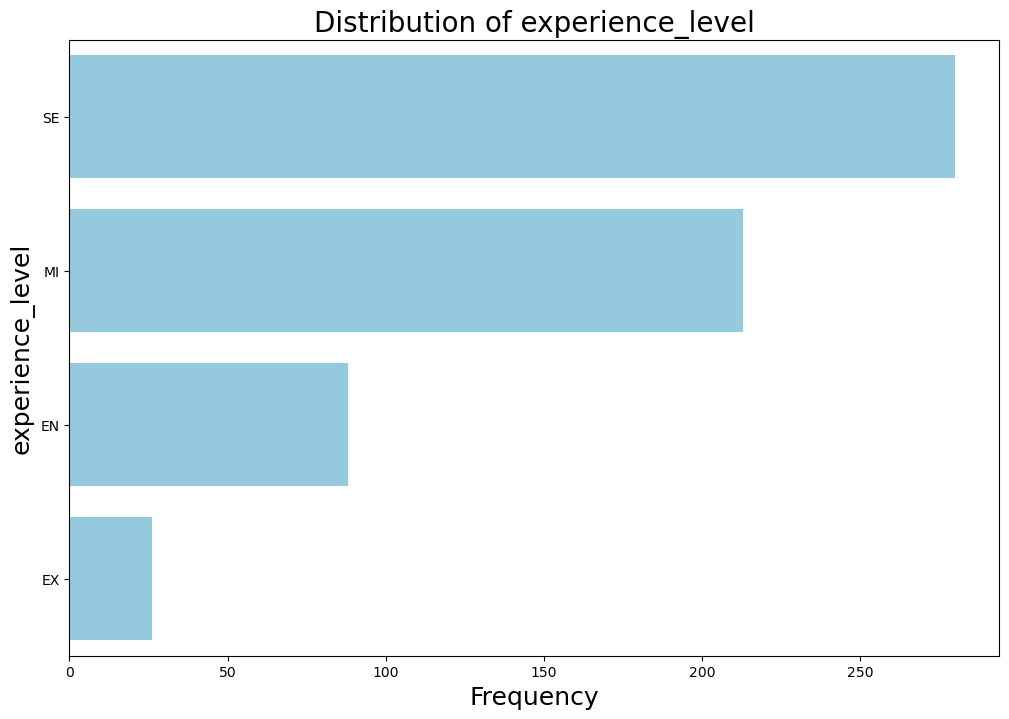

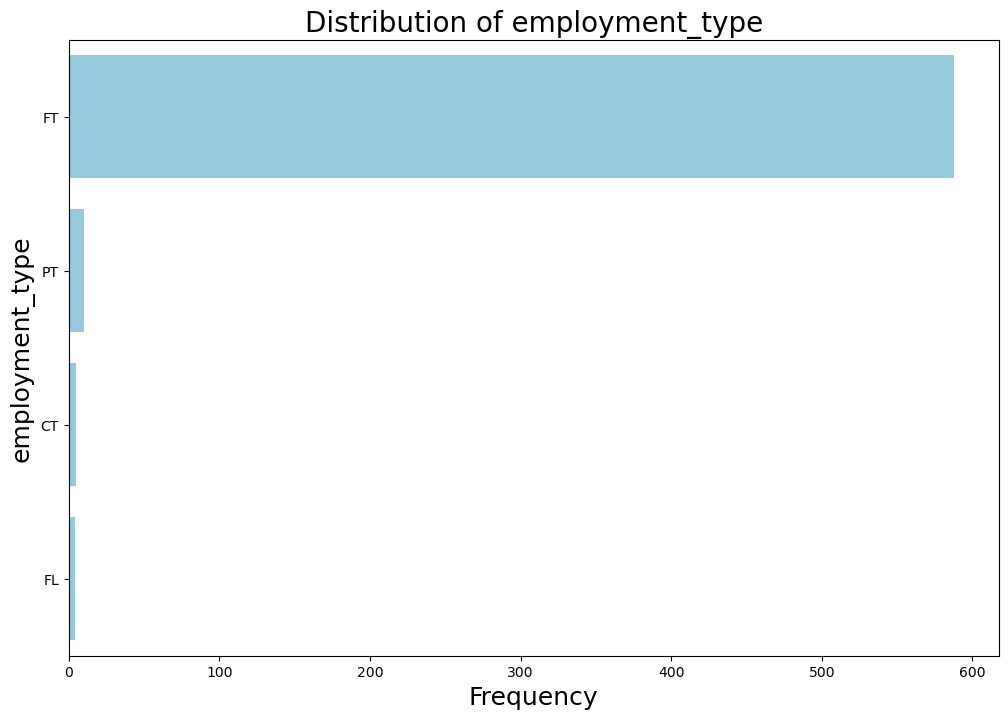

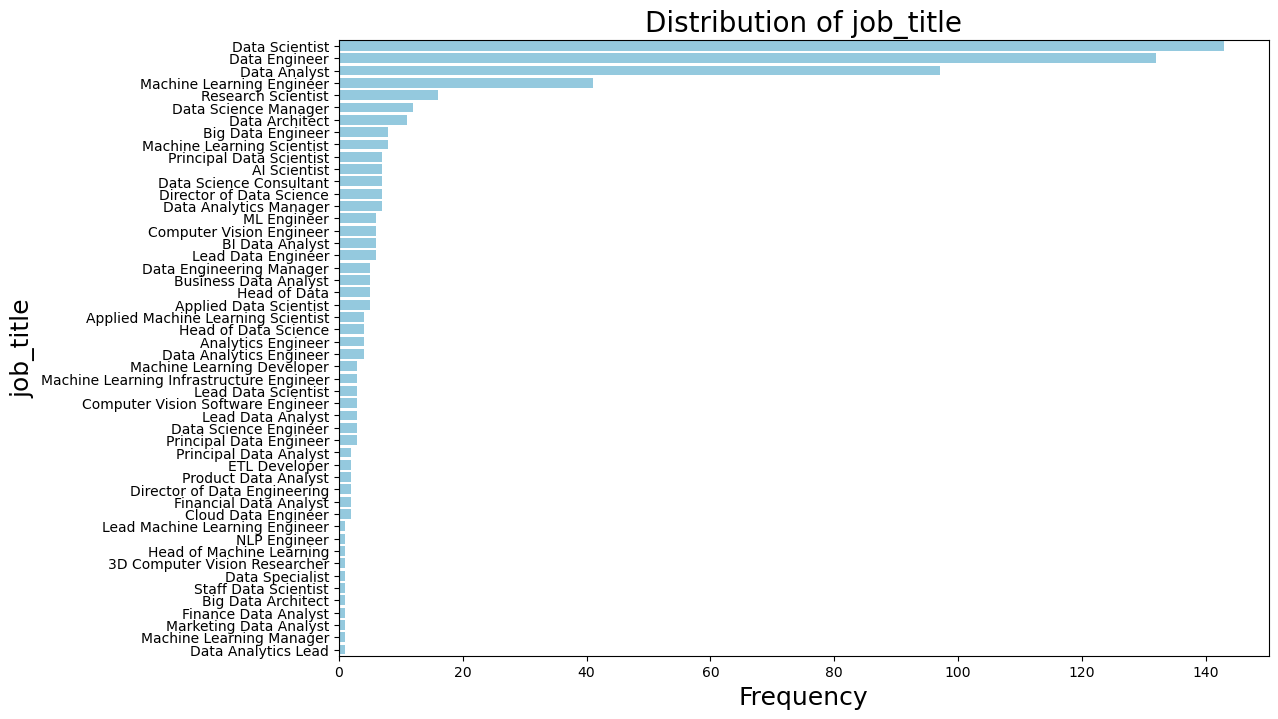

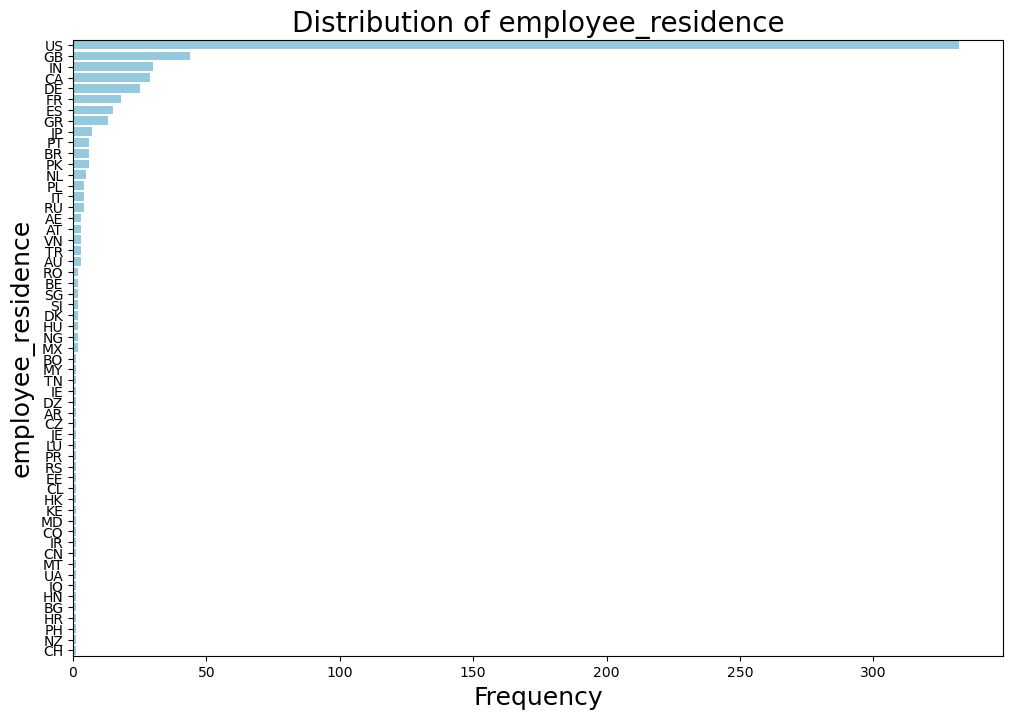

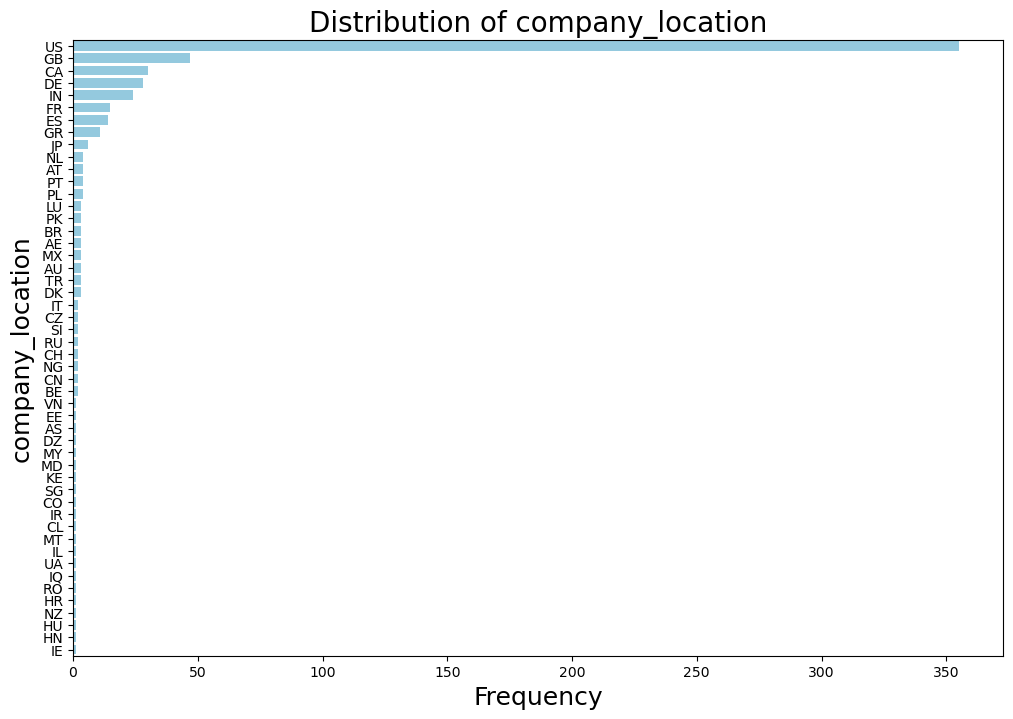

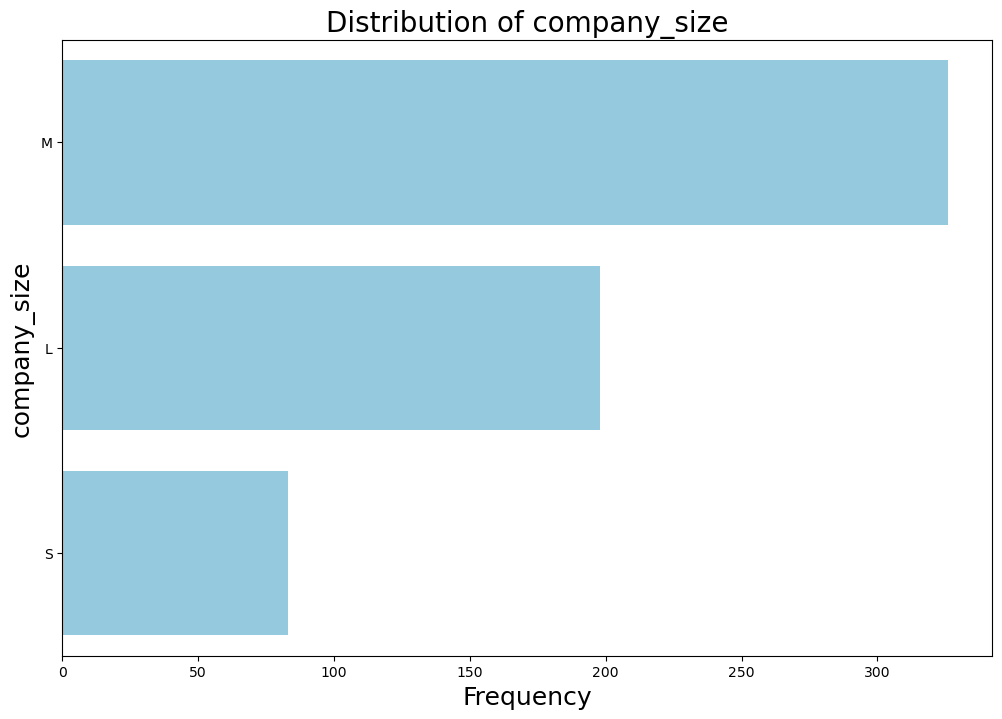

In [5]:
# numerical features list
numerical_features = ['salary', 'salary_in_usd', 'remote_ratio']
# Create histograms
for feature in numerical_features:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[feature], color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=20)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.show()
# categorical features list
categorical_features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
# Create count plots
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    chart = sns.countplot(y=feature, data=df, order=df[feature].value_counts().index,color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=20)
    plt.xlabel('Frequency', fontsize=18)
    plt.ylabel(feature, fontsize=18)
    plt.show()

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/511699872.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('work_year').apply(remove_outliers, column='salary_in_usd')


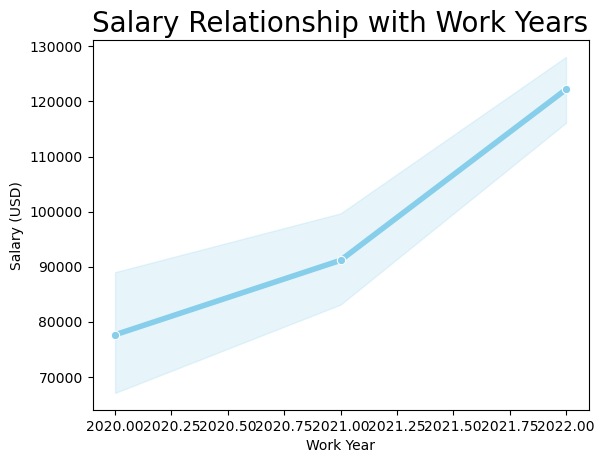

In [6]:
# remove the outlier bigger than upper bound and lower than lower bound
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
filtered_df = df.groupby('work_year').apply(remove_outliers, column='salary_in_usd')
# Create a line plot
sns.lineplot(x='work_year', y='salary_in_usd', data=filtered_df, marker='o', color='skyblue', linewidth=4)
plt.title('Salary Relationship with Work Years', fontsize=20)
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
# Show the plot
plt.show()

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/3938893500.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('experience_level').apply(remove_outliers, column='salary_in_usd')


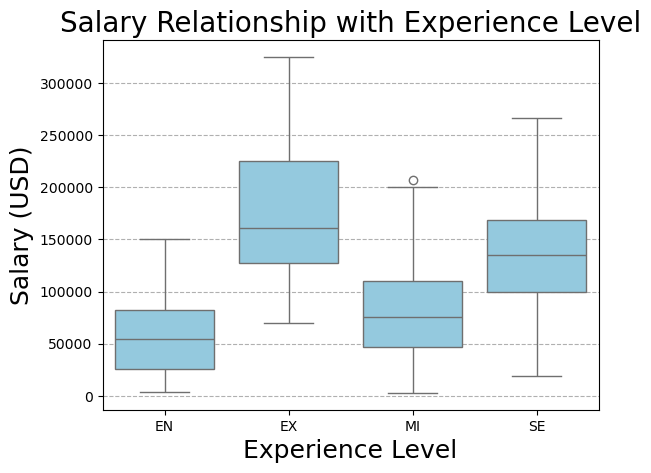

In [7]:
# Remove outliers
filtered_df = df.groupby('experience_level').apply(remove_outliers, column='salary_in_usd')  
# Crreat a boxplot
sns.boxplot(x='experience_level', y='salary_in_usd', data=filtered_df,color='skyblue')
plt.title('Salary Relationship with Experience Level', fontsize=20)
plt.xlabel('Experience Level', fontsize=18)
plt.ylabel('Salary (USD)', fontsize=18)
# Add grid lines to better illustrate
plt.grid(axis='y', linestyle='--')
plt.show()

I choose not to use the employment type because it has limited variation and impact on salary compared to other features like job title, experience level, and remote ratio. Most entries in the dataset fall under a dominant category, such as “Full-time,” which reduces the statistical significance of comparisons across employment types. Additionally, employment type may overlap with other features, such as remote work preferences or job titles, making it redundant in the analysis. By excluding employment type, I can focus on more relevant and variable factors that provide deeper insights into salary trends.

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/590531866.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('job_title').apply(remove_outliers, column='salary_in_usd')


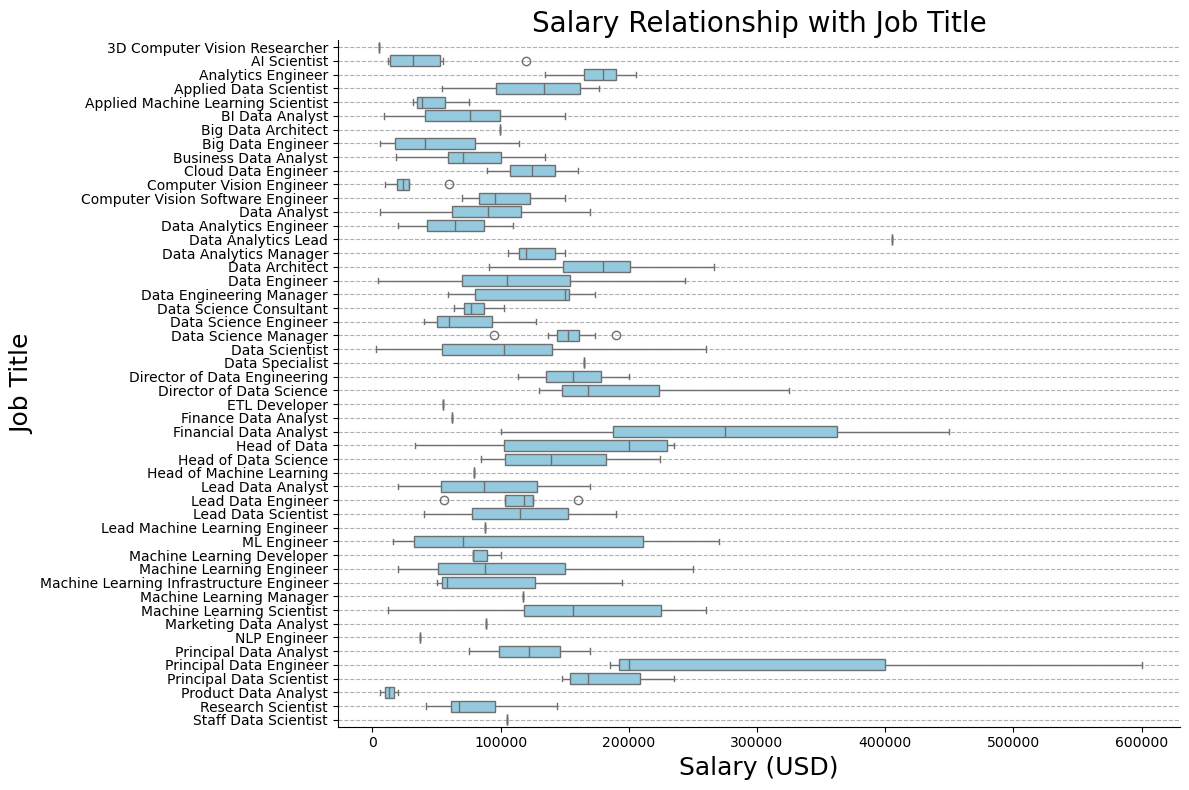

In [8]:
# Remove outliers
filtered_df = df.groupby('job_title').apply(remove_outliers, column='salary_in_usd')
# Create boxplot
plt.figure(figsize=(12,8))
sns.boxplot(y='job_title', x='salary_in_usd', data=filtered_df, color='skyblue')
plt.title('Salary Relationship with Job Title', fontsize=20)
plt.xlabel('Salary (USD)', fontsize=18)
plt.ylabel('Job Title', fontsize=18)
plt.grid(axis='y', linestyle='--')
sns.despine()
plt.tight_layout()
plt.show()

Since there are so many job titles and some of them do not have a decent amount of data to identify the relationship with salary, I choose to categorize job titles into broader groups like ‘Data Scientist’, ‘Data Engineer’, ‘Data Analyst’, and ‘Machine Learning Specialist’. 

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/3767694571.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('job_category').apply(remove_outliers, column='salary_in_usd')


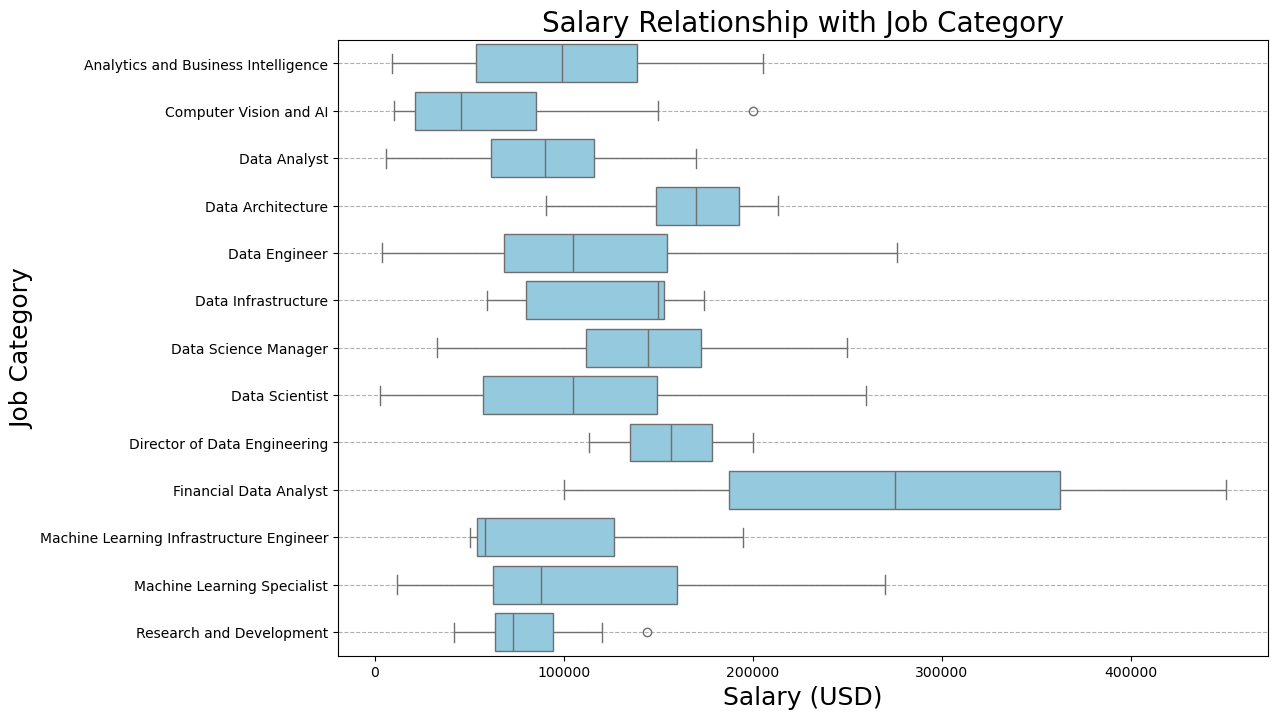

In [9]:
# Map job to a bigger title and name it job category
title_mapping = {
    'Data Scientist': [
        'Data Scientist', 'Lead Data Scientist', 'Applied Data Scientist', 'Principal Data Scientist'
    ],
    'Data Engineer': [
        'Data Engineer', 'Lead Data Engineer', 'Big Data Engineer', 'Principal Data Engineer', 'Cloud Data Engineer', 'Big Data Architect'
    ],
    'Machine Learning Specialist': [
        'Machine Learning Specialist', 'Machine Learning Engineer', 'Lead Machine Learning Engineer', 'Head of Machine Learning', 'ML Engineer', 'Machine Learning Developer', 'NLP Engineer', 'Machine Learning Scientist','Machine Learning Manager', 'Head of Machine Learning'
    ],
    'Data Analyst': [
        'Data Analyst', 'Business Data Analyst', 'Principal Data Analyst', 'Product Data Analyst', 'Finance Data Analyst', 'Lead Data Analyst'
    ],
    'Data Science Manager': [
        'Data Science Manager', 'Head of Data Science', 'Director of Data Science', 'Data Science Engineer', 'Data Analytics Manager', 'Data Analytics Lead', 'Machine Learning Manager', 'Head of Data'
    ],
    'Data Infrastructure': [
        'Data Infrastructure Engineer', 'Data Science Infrastructure Engineer', 'Data Engineering Manager'
    ],
    'Research and Development': [
        'Research Scientist', 'Data Science Consultant', '3D Computer Vision Researcher'
    ],
    'Data Architecture': [
        'Data Architect', 'Data Specialist', 'ETL Developer'
    ],
    'Computer Vision and AI': [
        'Computer Vision Engineer', 'Computer Vision Software Engineer', 'AI Scientist', 'Applied Machine Learning Scientist'
    ],
    'Analytics and Business Intelligence': [
        'Data Analytics Engineer', 'BI Data Analyst', 'Analytics Engineer', 'Staff Data Scientist', 'Marketing Data Analyst'
    ]
}

df['job_category'] = df['job_title'].replace({k: v for v, ks in title_mapping.items() for k in ks})
# Remove the outliers
filtered_df = df.groupby('job_category').apply(remove_outliers, column='salary_in_usd')
plt.figure(figsize=(12, 8))
# Draw a boxplot
sns.boxplot(x='salary_in_usd', y='job_category', data=filtered_df,color='skyblue')
plt.title('Salary Relationship with Job Category', fontsize=20)
plt.xlabel('Salary (USD)', fontsize=18)
plt.ylabel('Job Category', fontsize=18)
plt.grid(axis='y', linestyle='--') # make sure which boxplot is for which job category
plt.show()

Since salary and currency are used to calculate salary_in_usd, I choose not to include them in the analysis. Including these variables would introduce redundancy, as they are directly related to salary_in_usd and do not provide additional insights beyond what is already captured by the unified salary metric in USD. By focusing solely on salary_in_usd, I ensure a more streamlined and meaningful analysis of salary trends without unnecessary overlap.

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/2174255439.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('employee_residence').apply(remove_outliers, column='salary_in_usd')


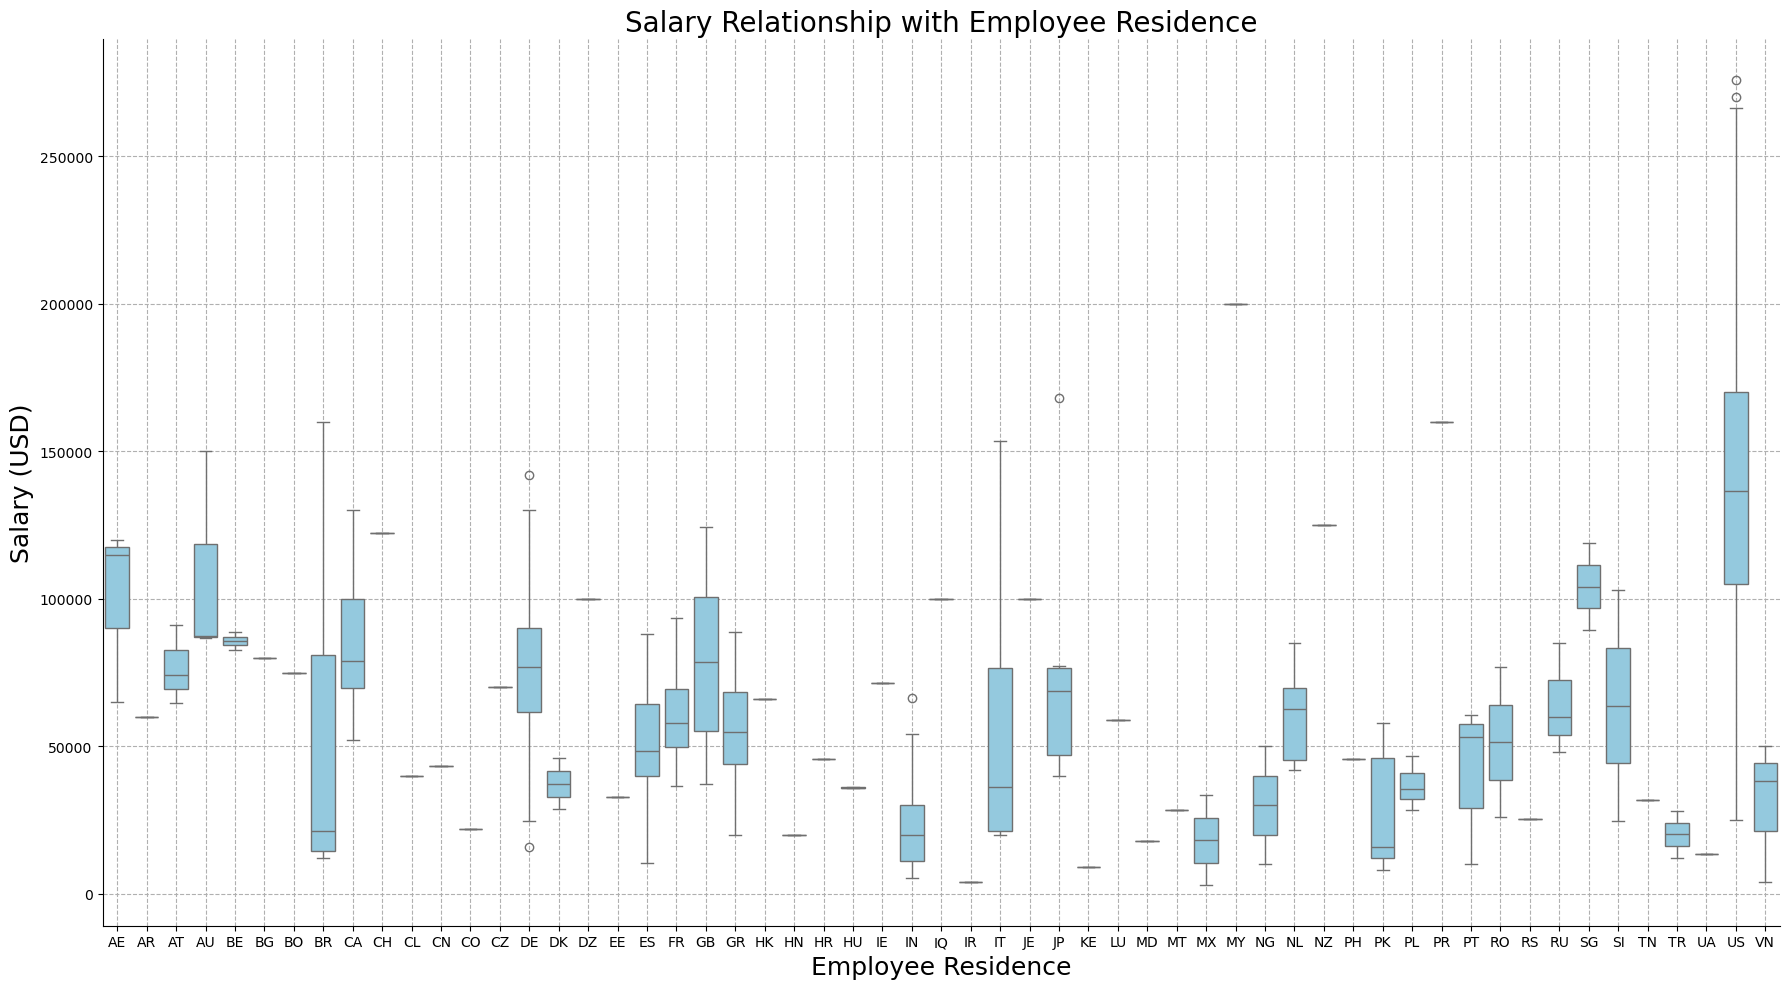

In [10]:
plt.figure(figsize=(18, 10))
# Remove the outliers
filtered_df = df.groupby('employee_residence').apply(remove_outliers, column='salary_in_usd')
# Create boxplot
sns.boxplot(x='employee_residence', y='salary_in_usd', data=filtered_df,width=0.8,color='skyblue')
plt.title('Salary Relationship with Employee Residence', fontsize=20)
plt.xlabel('Employee Residence', fontsize=18)
plt.ylabel('Salary (USD)', fontsize=18)
plt.grid(axis='both', linestyle='--')  # Add grid lines for better view
plt.tight_layout()
sns.despine()
plt.show()

Since there are so many countries, I decided to distinguish them by region, which can include less character.

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/2685278775.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('region').apply(remove_outliers, column='salary_in_usd')


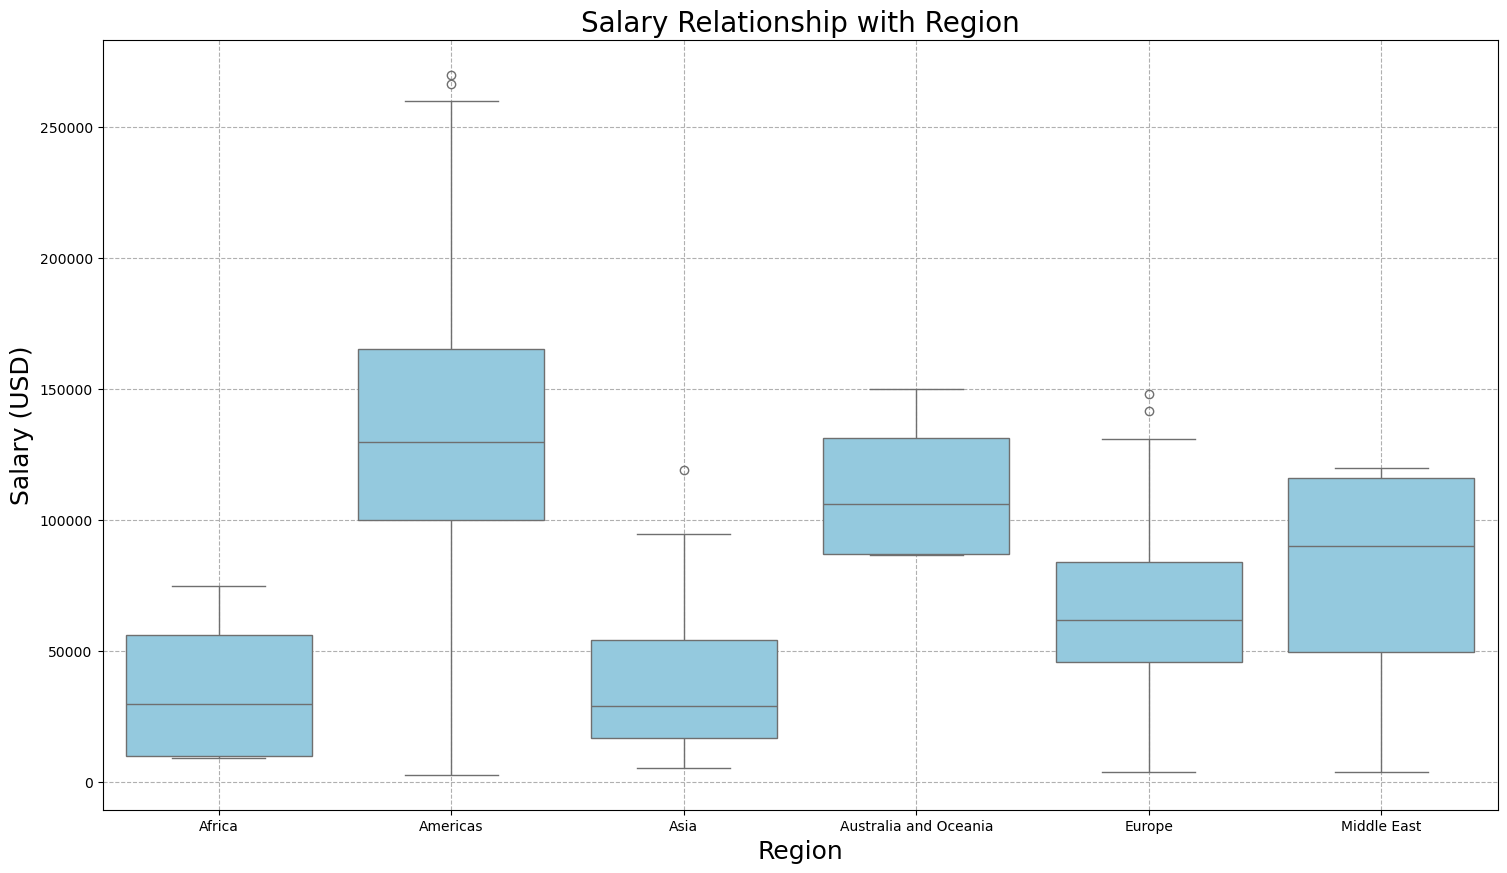

In [11]:
# Map the residence to region
region_mapping = {
    'Americas': ['US', 'CA', 'MX', 'BR', 'AR', 'CL', 'PE', 'CO', 'VE', 'EC', 'HN' ],
    'Europe': ['GB', 'DE', 'FR', 'IT', 'ES', 'NL', 'SE', 'NO', 'PL', 'CH', 'AT', 'BE', 'HU', 'PT', 'GR', 'DK', 'RU', 'HR', 'BG', 'IQ', 
               'VN', 'UA', 'MT', 'RO', 'MD', 'SI', 'TR', 'RS', 'PR', 'LU','CZ', 'DZ', 'TN', 'EE', 'LV', 'LT', 'IE','JE'],
    'Asia': ['CN', 'JP', 'IN', 'SG', 'HK', 'KR', 'TW', 'TH', 'MY', 'PH','PK'],
    'Australia and Oceania': ['AU', 'NZ'],
    'Africa': ['ZA', 'NG', 'EG', 'KE', 'GH','BO'],
    'Middle East': ['AE', 'SA', 'IL', 'QA', 'OM', 'KW', 'IR']}
df['region'] = df['employee_residence'].replace({k: v for v, ks in region_mapping.items() for k in ks})
# Remove outliers
filtered_df = df.groupby('region').apply(remove_outliers, column='salary_in_usd')
# Create boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(x='region', y='salary_in_usd', data=filtered_df, width=0.8,color='skyblue') 
plt.title('Salary Relationship with Region', fontsize=20)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Salary (USD)', fontsize=18)
plt.grid(axis='both', linestyle='--')  # Add grid lines for better view
plt.show()

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/565046135.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('employee_residence').apply(remove_outliers, column='salary_in_usd')


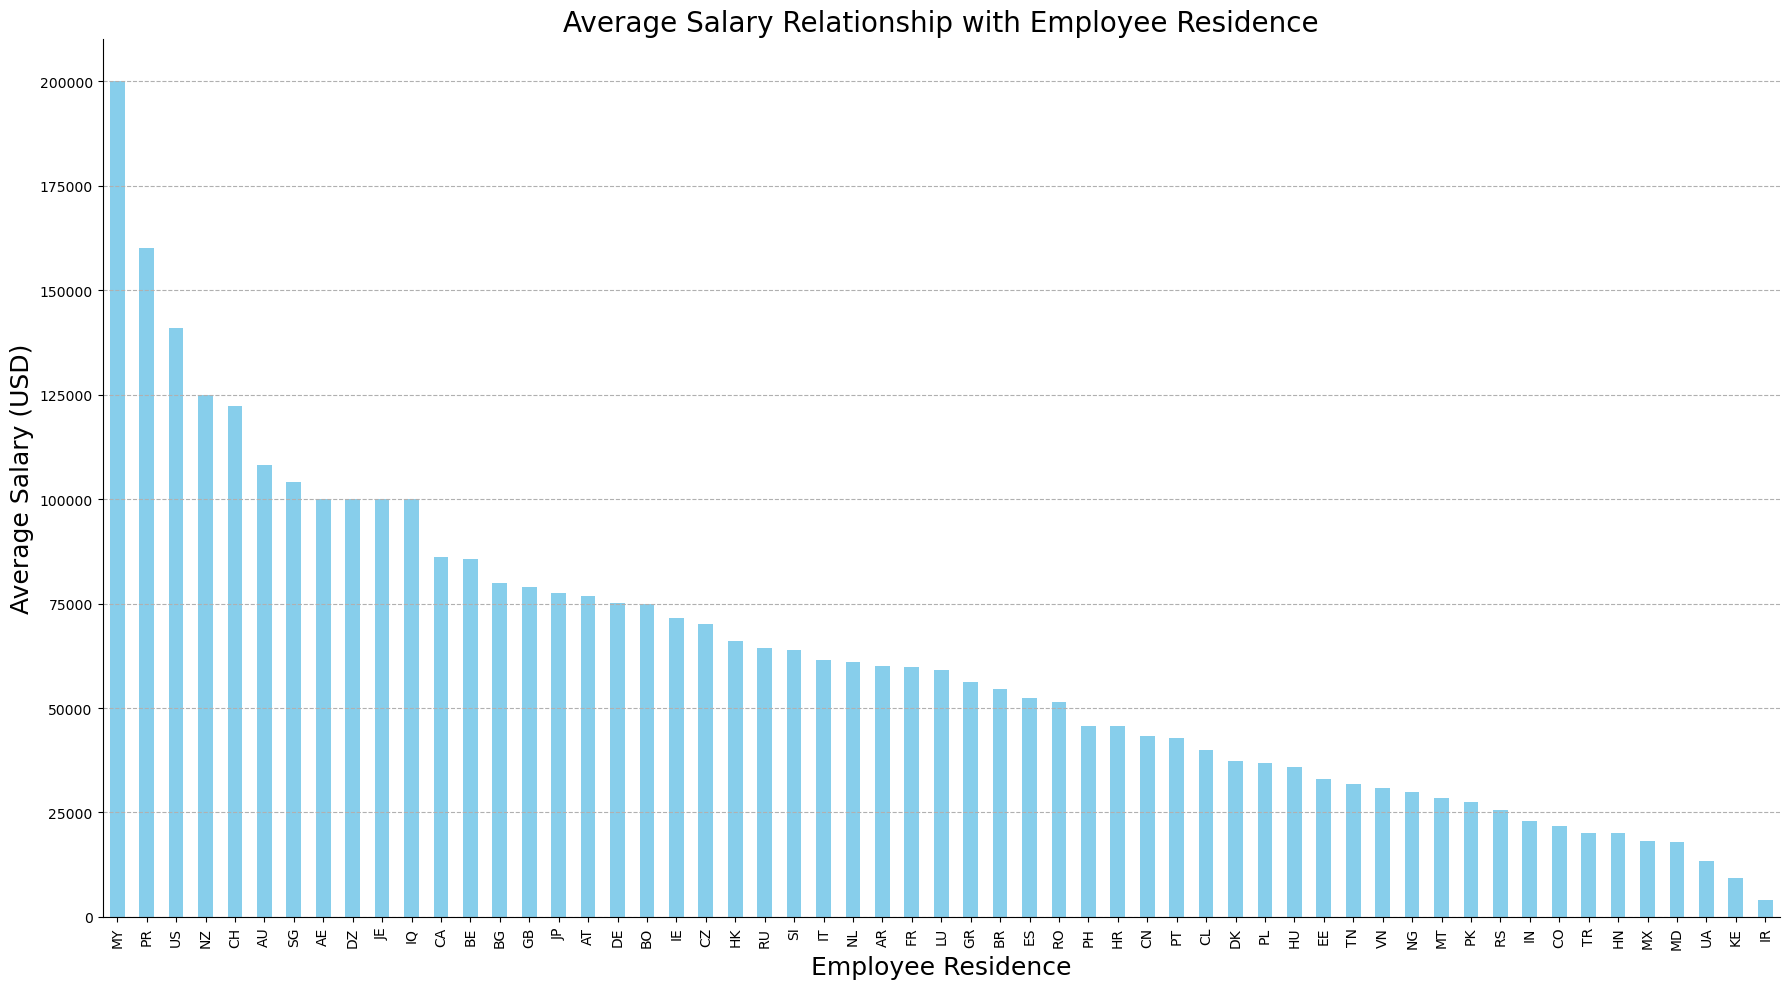

In [12]:
plt.figure(figsize=(18,10))
# Remove outliers
filtered_df = df.groupby('employee_residence').apply(remove_outliers, column='salary_in_usd')
# Ensure 'employee_residence' is not set as an index
filtered_df.reset_index(drop=True, inplace=True)
average_salary_by_residence = filtered_df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
# Creat a bar chart
average_salary_by_residence.plot(kind='bar', color='skyblue')
plt.title('Average Salary Relationship with Employee Residence', fontsize=20)
plt.xlabel('Employee Residence', fontsize=18)
plt.ylabel('Average Salary (USD)', fontsize=18)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
sns.despine()
plt.show()

Devide this into regions as well.

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/2146173692.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('region').apply(remove_outliers, column='salary_in_usd')


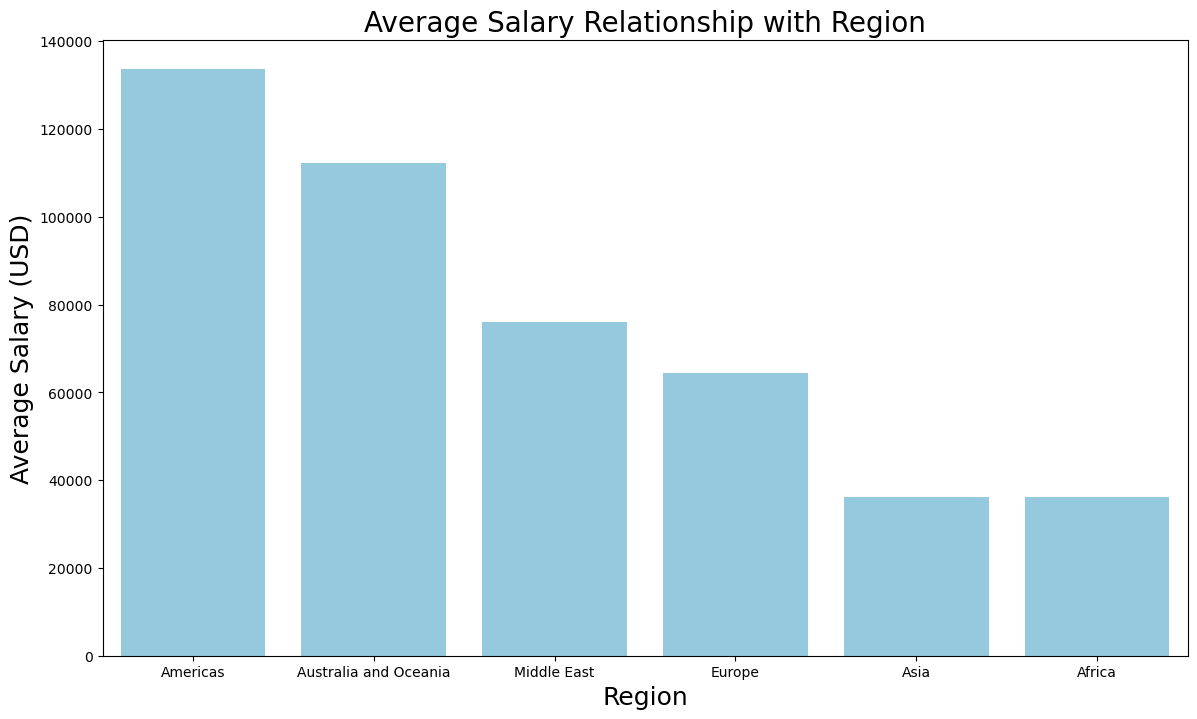

In [13]:
df['region'] = df['employee_residence'].replace({k: v for v, ks in region_mapping.items() for k in ks})
# Remove outliers
filtered_df = df.groupby('region').apply(remove_outliers, column='salary_in_usd')
# Ensure 'region' is not set as an index
filtered_df.reset_index(drop=True, inplace=True)
# Calculate average salary by region
average_salary_by_residence = filtered_df.groupby('region')['salary_in_usd'].mean().sort_values(ascending=False)
# Creat a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=average_salary_by_residence.index, y=average_salary_by_residence.values,color='skyblue')
plt.title('Average Salary Relationship with Region', fontsize=20)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Average Salary (USD)', fontsize=18)
plt.show()

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/4025960181.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('remote_ratio').apply(remove_outliers, column='salary_in_usd')


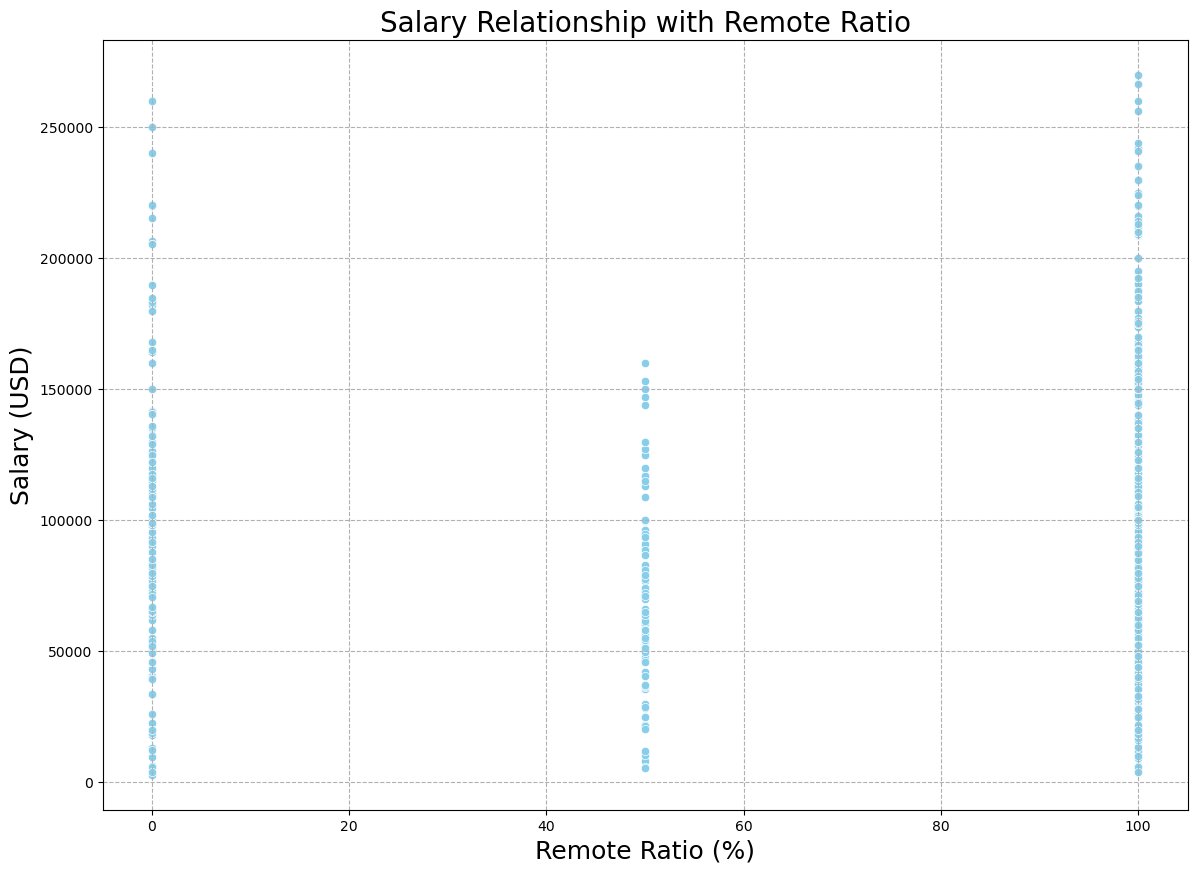

In [14]:
# Remove outliers
filtered_df = df.groupby('remote_ratio').apply(remove_outliers, column='salary_in_usd')
# Create a scatter plot
plt.figure(figsize=(14,10))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=filtered_df, color='skyblue')
plt.title('Salary Relationship with Remote Ratio', fontsize=20)
plt.xlabel('Remote Ratio (%)', fontsize=18)
plt.ylabel('Salary (USD)', fontsize=18)
# Add grid lines
plt.grid(axis='both', linestyle='--')
plt.show()

I will not choose to analyze company_location alongside employee_residence because these variables overlap significantly and could introduce redundancy in the analysis. Both variables essentially represent geographical locations and may reflect similar regional economic conditions, cost of living, and salary scales. Including both could complicate the interpretation of data without adding valuable insights. For instance, a company’s location often corresponds closely with where employees reside, especially in scenarios where remote work is not predominant. This overlap means that examining both separately could lead to misleading conclusions or overstate the importance of location on salary variations. By focusing solely on employee_residence, I can more clearly assess how geographical factors influence salaries without the confounding effects that might arise if company_location were also considered. This approach simplifies the analysis and ensures more straightforward, actionable insights derived from geographical distinctions.

/var/folders/rf/k6fdqq_52_x39k7krys_27d40000gn/T/ipykernel_64384/366395911.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('company_size').apply(remove_outliers, column='salary_in_usd')


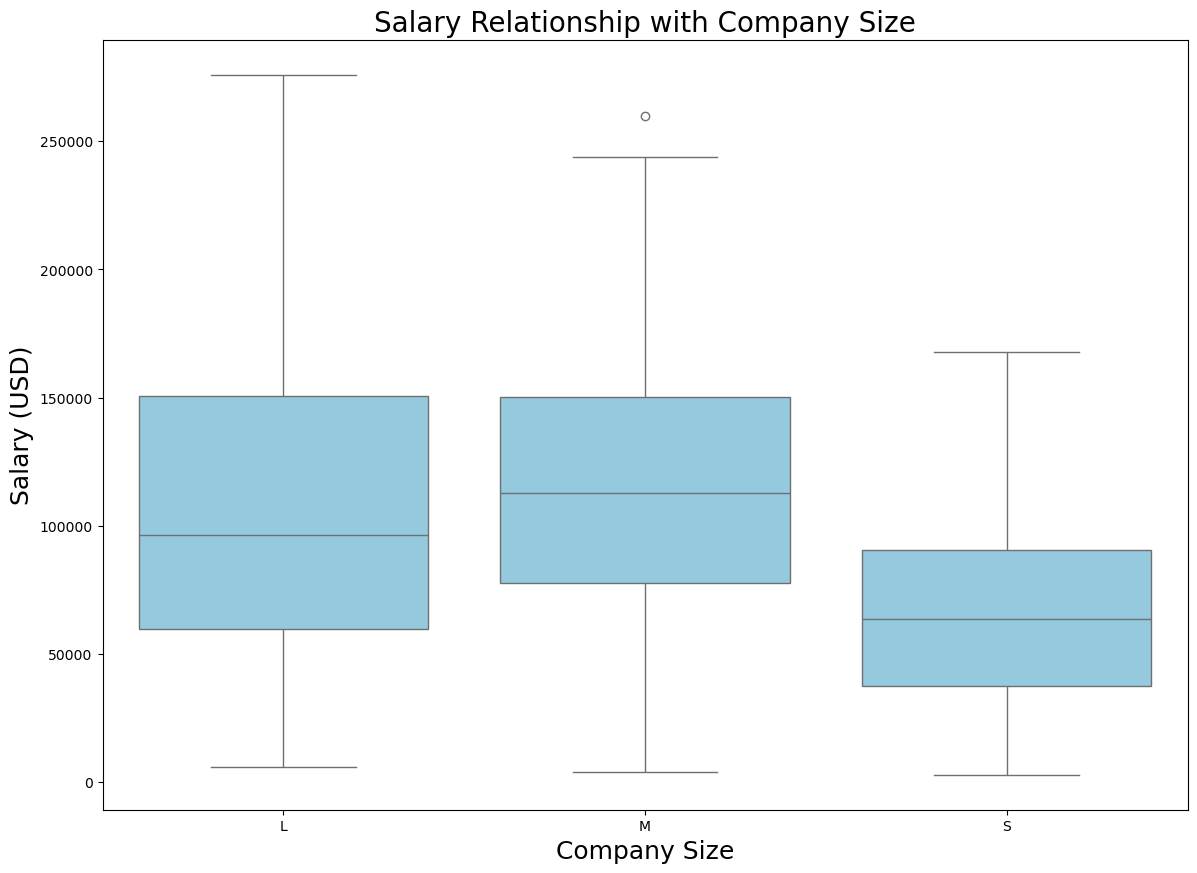

In [15]:
filtered_df = df.groupby('company_size').apply(remove_outliers, column='salary_in_usd')
# Create a boxplot
plt.figure(figsize=(14,10))
sns.boxplot(x='company_size', y='salary_in_usd', data=filtered_df,color='skyblue')
plt.title('Salary Relationship with Company Size', fontsize=20)
plt.xlabel('Company Size', fontsize=18)
plt.ylabel('Salary (USD)', fontsize=18)
plt.show()

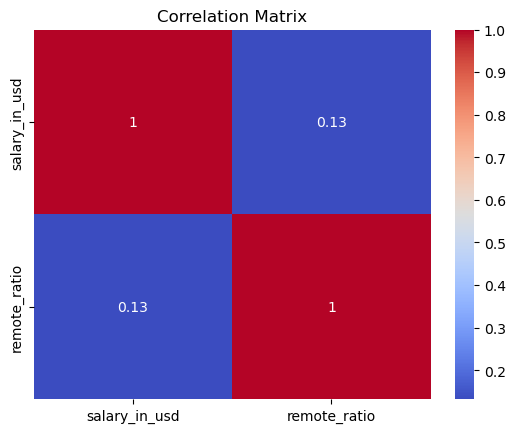

In [16]:
#Create a heatmap between salary and remote ratio
correlation_matrix = df[['salary_in_usd','remote_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Since there are only two numeric columns, I built a graph to test the correlation. The correlation index is 0.16, which is relatively small. I do not want choose remote as my data therefore.

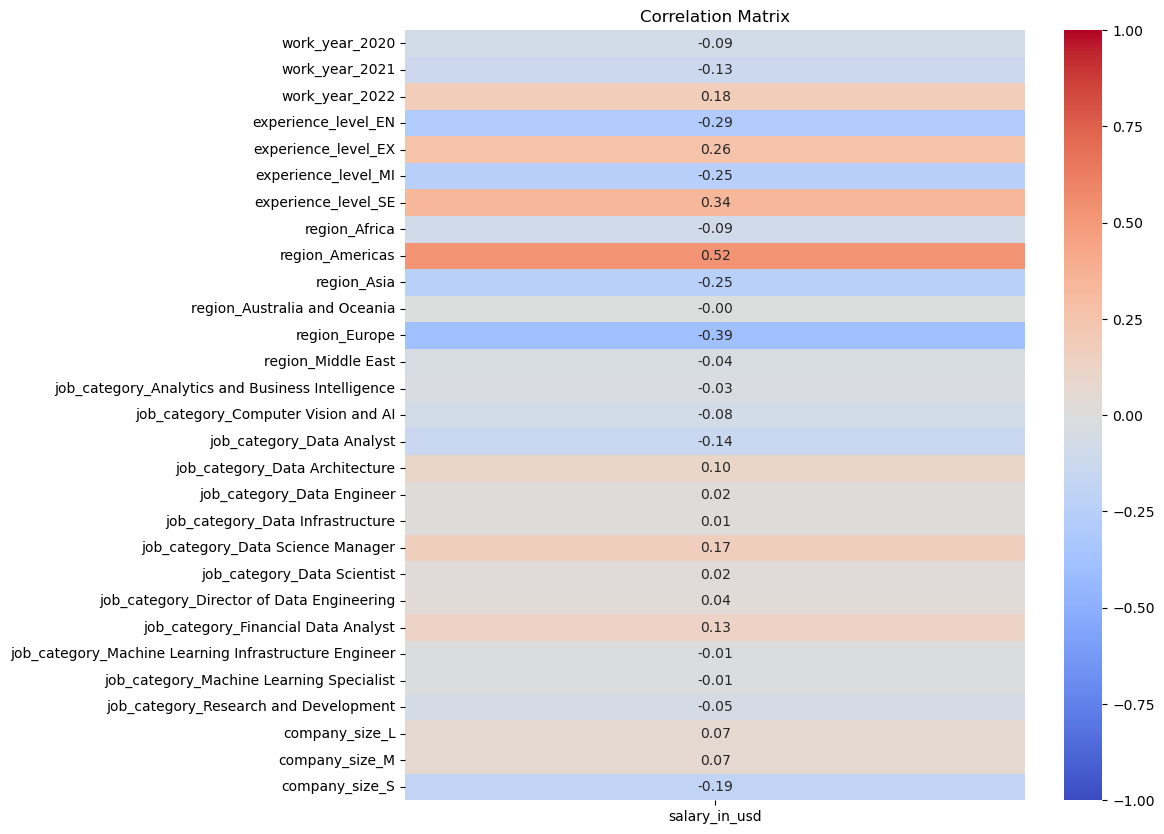

In [17]:
from sklearn.preprocessing import OneHotEncoder
# Select the target and categorical features
target_variable = 'salary_in_usd'
categorical_features = ['work_year', 'experience_level', 'region', 'job_category', 'company_size']
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply OneHotEncoder to the categorical features
encoded_features = encoder.fit_transform(df[categorical_features])
# Create a DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)
# Concatenate the target variable to the dataframe
encoded_df[target_variable] = df[target_variable]
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()
# Filter the matrix
salary_correlations = correlation_matrix[[target_variable]].drop(target_variable)
# Visualize
plt.figure(figsize=(10,10))
sns.heatmap(salary_correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we see significant variations in how different regions, experience levels, and job categories correlate with salary. The ‘region_Americas’ notably stands out with a strong positive correlation of 0.63, suggesting higher salaries in this region, making it a crucial factor for further analysis. Additionally, ‘experience_level_SE’ (Senior Level) shows a positive correlation of 0.46 with salary, indicating that higher experience levels generally correspond with higher earnings. These insights are pivotal for understanding the impact of geographical location and experience on salary disparities. Therefore, I choose to advance with ‘region’ and ‘experience_level’ as key features for building the predictive model, as they offer substantial differentiation in salary outcomes and can provide valuable directional insights for strategic compensation planning and talent management.

In [18]:
from sklearn.compose import ColumnTransformer
# Select categorical columns
categorical_features = ['region', 'experience_level', 'job_category']
# Create the OneHotEncoder object
encoder = OneHotEncoder()  
# Create a column transformer to apply the encoder
column_transformer = ColumnTransformer([("cat", encoder, categorical_features)], remainder='passthrough')
# Fit and transform the data
encoded_data = column_transformer.fit_transform(df)
# Get new column names
encoded_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Remain other columns not encoded
remaining_columns = [col for col in df.columns if col not in categorical_features]
# List of new column
new_columns = list(encoded_columns) + remaining_columns
# Construct the DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)
# Display
print(encoded_df.head())

from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df['salary_in_usd_scaled'] = scaler.fit_transform(df[['salary_in_usd']])

  region_Africa region_Americas region_Asia region_Australia and Oceania  \
0           0.0             0.0         0.0                          0.0   
1           0.0             0.0         1.0                          0.0   
2           0.0             0.0         0.0                          0.0   
3           0.0             1.0         0.0                          0.0   
4           0.0             1.0         0.0                          0.0   

  region_Europe region_Middle East experience_level_EN experience_level_EX  \
0           1.0                0.0                 0.0                 0.0   
1           0.0                0.0                 0.0                 0.0   
2           1.0                0.0                 0.0                 0.0   
3           0.0                0.0                 0.0                 0.0   
4           0.0                0.0                 0.0                 0.0   

  experience_level_MI experience_level_SE  ... work_year employment_type  

This is the normalized f=key features for further use.

Cross-validation results (MSE and R-squared):
LinearRegression: MSE=0.313755, RMSE=0.560, R²=0.4098
Lasso: MSE=0.412488, RMSE=0.642, R²=0.2248
Ridge: MSE=0.308426, RMSE=0.555, R²=0.4185
RandomForest: MSE=0.324864, RMSE=0.570, R²=0.3726

Best Model by MSE (Cross-validation) is: Ridge


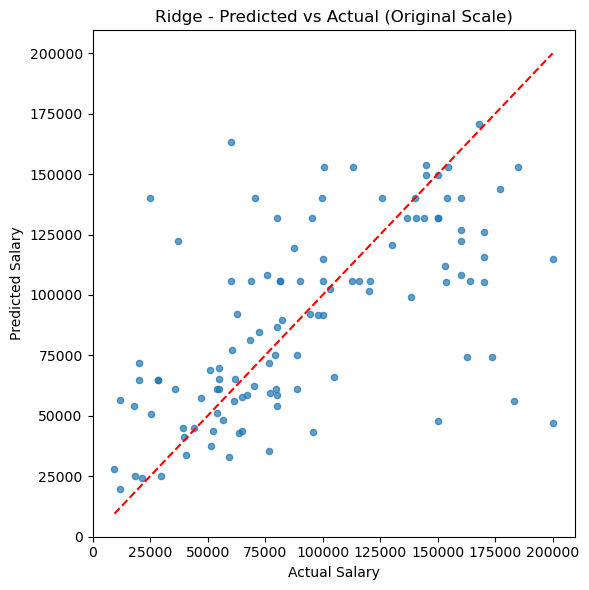

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# Define target and features
target = 'salary_in_usd'
features = ['region', 'experience_level', 'job_category', 'company_size']

# Remove missing values in target
df = df.dropna(subset=[target])

# Remove outliers (top 1% salaries)
upper_bound = df[target].quantile(0.99)
df = df[df[target] <= upper_bound]

# Fill missing categorical values if any
for col in features:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Log transform the target
df['log_salary'] = np.log1p(df[target])

X = pd.get_dummies(df[features], drop_first=True)
y = df['log_salary'].values

# Define the models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, random_state=RANDOM_SEED),
    "Ridge": Ridge(alpha=1.0, random_state=RANDOM_SEED),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
}

# Perform 10-fold cross-validation and compute MSE and R-squared for each model
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
results = {}
r2_results = {}

for name, model in models.items():
    # Compute MSE
    cv_scores_mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    mean_mse = cv_scores_mse.mean()
    results[name] = mean_mse

    # Compute R-squared
    cv_scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    mean_r2 = cv_scores_r2.mean()
    r2_results[name] = mean_r2

# Print cross-validation results
print("Cross-validation results (MSE and R-squared):")
for name in models.keys():
    print(f"{name}: MSE={results[name]:.6f}, RMSE={np.sqrt(results[name]):.3f}, R²={r2_results[name]:.4f}")

# Identify the best model by MSE
best_model_name = min(results, key=results.get)
print(f"\nBest Model by MSE (Cross-validation) is: {best_model_name}")

# Train the best model and evaluate on test set
final_model = models[best_model_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
y_pred_log = final_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)



# Predicted vs Actual Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.7, s=20)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title(f"{best_model_name} - Predicted vs Actual (Original Scale)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.tight_layout()
plt.show()






In [56]:
import joblib
#test to get correct columns
print("Feature names used for training:")
print(X.columns) #test print

#random forest does not have .feature_names_in attribute thus manually create it
final_model.feature_names_in_=X.columns.tolist()  
print("Model feature names saved:", final_model.feature_names_in_)#test print

#save and dump model
joblib.dump(final_model, 'ridge_model.pkl')
print("Model saved as ridge_model.pkl")

Feature names used for training:
Index(['region_Americas', 'region_Asia', 'region_Australia and Oceania',
       'region_Europe', 'region_Middle East', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE',
       'job_category_Computer Vision and AI', 'job_category_Data Analyst',
       'job_category_Data Architecture', 'job_category_Data Engineer',
       'job_category_Data Infrastructure', 'job_category_Data Science Manager',
       'job_category_Data Scientist',
       'job_category_Director of Data Engineering',
       'job_category_Financial Data Analyst',
       'job_category_Machine Learning Infrastructure Engineer',
       'job_category_Machine Learning Specialist',
       'job_category_Research and Development', 'company_size_M',
       'company_size_S'],
      dtype='object')
Model feature names saved: ['region_Americas', 'region_Asia', 'region_Australia and Oceania', 'region_Europe', 'region_Middle East', 'experience_level_EX', 'experience_level_MI', 'e